In [7]:
import hashlib
import pandas as pd

# Blockchain Node Class
class BlockchainNode:
    def __init__(self, node_id, port, blockchain=None):
        self.node_id = node_id
        self.port = port
        self.blockchain = blockchain if blockchain else []
        
    def create_block(self, data):
        """Create a new block and append to the blockchain."""
        block = {
            'block_id': len(self.blockchain) + 1,
            'data': data,
            'previous_hash': self.blockchain[-1]['hash'] if self.blockchain else '0',
        }
        block['hash'] = hashlib.sha256(str(block).encode()).hexdigest()
        self.blockchain.append(block)
        return block

    def get_blockchain(self):
        return self.blockchain

# Create 5 nodes in the network
nodes = [BlockchainNode(node_id=i, port=8000+i) for i in range(5)]

# Nodes interact by creating blocks
for node in nodes:
    data = f"Transaction data from node {node.node_id}"
    node.create_block(data)

# Print the blockchain of node 0 as an example
print(nodes[0].get_blockchain())


[{'block_id': 1, 'data': 'Transaction data from node 0', 'previous_hash': '0', 'hash': '715e4ddc3c46729ee8e8b69df1a0a53f94a46a1fccc240f3477e057c07c5da0e'}]


In [8]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Simulate transaction data (for simplicity)
data = {
    'transaction_size': [0.1, 0.3, 0.5, 0.7, 0.2, 0.8],
    'transaction_fee': [0.02, 0.05, 0.07, 0.1, 0.04, 0.09],
    'is_added_to_blockchain': [1, 0, 1, 1, 0, 1]  # Labels: 1 for added, 0 for not added
}

df = pd.DataFrame(data)

# Features and Labels
X = df[['transaction_size', 'transaction_fee']].values
y = df['is_added_to_blockchain'].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

# Define a simple ANN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_dim=2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=1)

# Evaluate the model
accuracy = model.evaluate(X_test, y_test)
print(f"ANN Model Accuracy: {accuracy[1]:.2f}")


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 4 samples
Epoch 1/100
4/4 [==============================] - 0s 17ms/sample - loss: 0.7097 - acc: 0.2500
Epoch 2/100
4/4 [==============================] - 0s 193us/sample - loss: 0.7077 - acc: 0.2500
Epoch 3/100
4/4 [==============================] - 0s 0s/sample - loss: 0.7063 - acc: 0.2500
Epoch 4/100
4/4 [==============================] - 0s 451us/sample - loss: 0.7050 - acc: 0.2500
Epoch 5/100
4/4 [==============================] - 0s 0s/sample - loss: 0.7036 - acc: 0.2500
Epoch 6/100
4/4 [==============================] - 0s 0s/sample - loss: 0.7029 - acc: 0.2500
Epoch 7/100
4/4 [==============================] - 0s 4ms/sample - loss: 0.7013 - acc: 0.2500
Epoch 8/100
4/4 [==============================] - 0s 0s/sample - loss: 0.7002 - acc: 0.2500
Epoch 9/100
4/4 [==============================] - 0s

4/4 [==============================] - 0s 4ms/sample - loss: 0.6432 - acc: 1.0000
Epoch 80/100
4/4 [==============================] - 0s 289us/sample - loss: 0.6425 - acc: 1.0000
Epoch 81/100
4/4 [==============================] - 0s 2ms/sample - loss: 0.6422 - acc: 1.0000
Epoch 82/100
4/4 [==============================] - 0s 0s/sample - loss: 0.6415 - acc: 1.0000
Epoch 83/100
4/4 [==============================] - 0s 997us/sample - loss: 0.6410 - acc: 1.0000
Epoch 84/100
4/4 [==============================] - 0s 0s/sample - loss: 0.6402 - acc: 1.0000
Epoch 85/100
4/4 [==============================] - 0s 0s/sample - loss: 0.6394 - acc: 1.0000
Epoch 86/100
4/4 [==============================] - 0s 4ms/sample - loss: 0.6391 - acc: 1.0000
Epoch 87/100
4/4 [==============================] - 0s 0s/sample - loss: 0.6386 - acc: 1.0000
Epoch 88/100
4/4 [==============================] - 0s 0s/sample - loss: 0.6378 - acc: 1.0000
Epoch 89/100
4/4 [==============================] - 0s 4ms/sampl

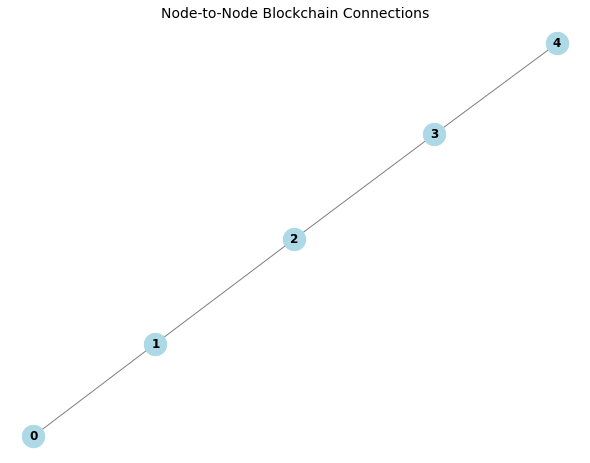

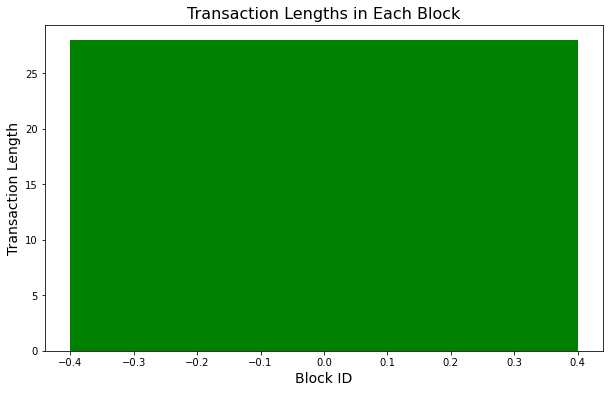

In [10]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a graph to visualize node-to-node connections
G = nx.Graph()

# Add nodes
for node in nodes:
    G.add_node(node.node_id, port=node.port)

# Add edges (for simplicity, let's assume nodes are connected in sequence)
for i in range(len(nodes) - 1):
    G.add_edge(nodes[i].node_id, nodes[i+1].node_id)

# Plot the node-to-node connection graph
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_size=500, node_color='lightblue', font_size=12, font_weight='bold', edge_color='gray')
plt.title("Node-to-Node Blockchain Connections", fontsize=14)
plt.show()

# Plot transaction data
transaction_data = [block['data'] for block in nodes[0].get_blockchain()]
plt.figure(figsize=(10, 6))
plt.bar(range(len(transaction_data)), [len(tx) for tx in transaction_data], color='green')
plt.title("Transaction Lengths in Each Block", fontsize=16)
plt.xlabel("Block ID", fontsize=14)
plt.ylabel("Transaction Length", fontsize=14)
plt.show()
